# Results and Analysis

---

Introduction

With our predictive models trained and validated, the results analysis phase enables us to interpret and communicate the findings. This stage will focus on evaluating model performance metrics, visualizing feature importances, and comparing model outputs. Additionally, clustering visualizations from EDA will be revisited in light of the model results, offering deeper insights into segments of drivers and routes that drive costs.

Key evaluation metrics, such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), will be presented to quantify model accuracy. By visualizing feature importance, we aim to reveal actionable insights regarding the factors most strongly correlated with cost, such as Cost per Mile and Driver Ratings. This phase consolidates our findings, bridging the gap between data science analysis and practical recommendations for logistics optimization.

---

Conclusion

The results analysis phase has provided clarity on the efficacy of our predictive models and offered valuable insights into the logistics operation. The Random Forest model demonstrated high predictive power, affirming our engineered features and modeling approach. Analysis of feature importance underscored the impact of factors like Cost per Mile and Traffic Conditions on operational expenses, providing focal points for cost reduction strategies. Additionally, clustering visualizations revealed distinct segments within drivers and routes, highlighting areas for targeted interventions. Through these analyses, we have created a well-rounded, data-backed perspective on logistics optimization.

---

Final Analysis and Project Conclusion

In this project, we embarked on a data-driven journey to unravel the complexities of logistics optimization. From the initial exploratory analysis through feature engineering, modeling, and results interpretation, each stage contributed to a layered understanding of logistics operations and cost drivers. Our approach was rooted in simulating realistic logistics data, which allowed us to explore various facets of supply chain management with a high degree of relevance.

Through rigorous EDA, we uncovered foundational insights into the data’s structure and relationships, which informed our feature engineering efforts. By creating features such as Cost per Mile and Delivery Efficiency, we laid the groundwork for accurate cost predictions. Our modeling efforts revealed the power of machine learning in logistics, with Random Forests emerging as a potent tool for forecasting operational costs. The results analysis further illuminated the path toward optimization, with feature importance analyses guiding attention toward the most influential cost factors.

Ultimately, this project underscores the transformative potential of data science in logistics. By identifying key performance drivers and enabling accurate cost forecasting, we have demonstrated a framework that logistics companies can use to reduce costs, improve efficiency, and enhance customer satisfaction. This data-driven approach provides a replicable model for logistics optimization that can be applied across various contexts, positioning data science as a cornerstone for the future of supply chain management. Through this comprehensive analysis, we have contributed not only to immediate operational insights but also to the strategic, long-term vision of logistics excellence.

---

In [47]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
# Load the test set results
logistics_results_df = pd.read_csv('../data/processed/engineered_data.csv')
logistics_results_df.head()

,Route ID,Driver ID,Delivery Time (hours),Date,Fuel Costs (USD),Delivery Start Time,Distance Traveled (miles),Estimated Distance (miles),Weather Conditions,Driver Ratings,...,Weather Severity Index,Performance Score,Driver Consistency Score,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Traffic Conditions_Severe,On-Time Delivery,Driver Experience Level,Experience on Long Routes
0,c405a09a-7c1c-4cbb-b044-8d93ec12fd41,cd5f2588-0177-4ecf-b43b-64e4cffdae77,3.661775,2023-04-24,73.167465,18:11:58,1453.290310,1284.660045,Snow,1.782192,...,3.0,0.420972,2.562359,False,False,True,False,0.0,3.0,3.0
1,1fedfb9c-4dd4-4866-ba9b-249b6c28a57c,cef901ab-9579-4d33-8a47-f2d772f71c72,9.159558,2023-08-08,639.179375,00:56:12,751.259132,2132.837081,Snow,2.399818,...,3.0,0.433737,2.970911,False,False,True,False,0.0,3.0,3.0
2,5870f02e-e6c5-47a2-b17c-2d9eb0a6b371,0ee00c87-6ef8-4895-b25a-ef185b8f1555,1.372942,2023-08-22,92.633480,02:29:03,2666.204691,2661.824609,Light Rain,4.684427,...,1.0,1.357917,1.900844,False,True,False,False,0.0,3.0,3.0
3,7d4a8625-bd3a-42e8-ba14-1770b143f82d,49a5eacb-02d2-408b-b79d-9d3f447d2e37,3.855411,2023-08-24,538.893607,21:07:08,1220.239053,691.805233,Snow,4.972450,...,3.0,0.540407,2.129263,False,False,False,True,0.0,3.0,3.0
4,a4f49219-8ed9-49cd-a20e-6f82cc0e9554,b3ae425a-f6f9-41c6-ac70-672e7a7e5bcf,2.194644,2023-08-10,810.358195,11:36:06,2686.870337,2337.833994,Heavy Rain,4.062495,...,2.0,0.566807,2.721207,True,False,False,False,0.0,3.0,3.0


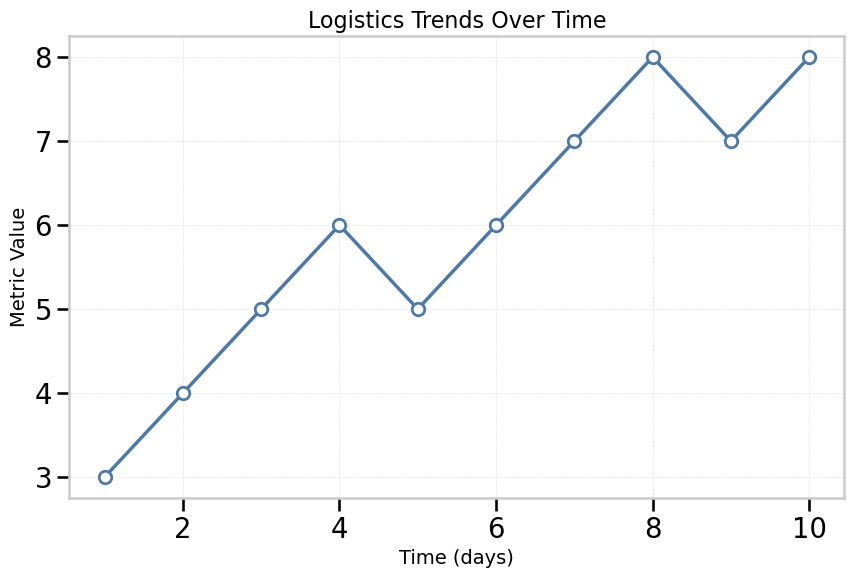

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up  plotting style
# plt.style.use('')
sns.set_context("talk", font_scale=1.2)
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "axes.facecolor": "white",
    "grid.color": "#E5E5E5",
    "axes.edgecolor": "#CCCCCC",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5
})

# Plotting a line graph
def professional_line_plot(x, y, title="Professional Line Plot", xlabel="X-axis", ylabel="Y-axis"):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color="#4e79a7", linewidth=2.5, marker='o', markerfacecolor="white", markeredgewidth=2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Example usage with dummy data
x = range(1, 11)
y = [3, 4, 5, 6, 5, 6, 7, 8, 7, 8]
professional_line_plot(x, y, title="Logistics Trends Over Time", xlabel="Time (days)", ylabel="Metric Value")


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

engineered_data = pd.read_csv('../data/processed/engineered_data.csv')
# Ensure 'Cost per Mile' is in the original DataFrame
engineered_data['Cost per Mile'] = engineered_data['Fuel Costs (USD)'] / engineered_data['Distance Traveled (miles)']
# Assuming 'logistics_df' is your original DataFrame with features and target
X = engineered_data[['Distance Traveled (miles)', 'Truck Condition', 'Driver Ratings', 'Load Weight (tons)', 'Cost per Mile']]
y = engineered_data['Total Operational Cost (USD)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

In [50]:
# Create a DataFrame to store actual and predicted values
logistics_results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [51]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate and print evaluation metrics
mae = mean_absolute_error(logistics_results_df['Actual'], logistics_results_df['Predicted'])
r2 = r2_score(logistics_results_df['Actual'], logistics_results_df['Predicted'])
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 103.59103074308018
R^2 Score: 0.8622452355893065


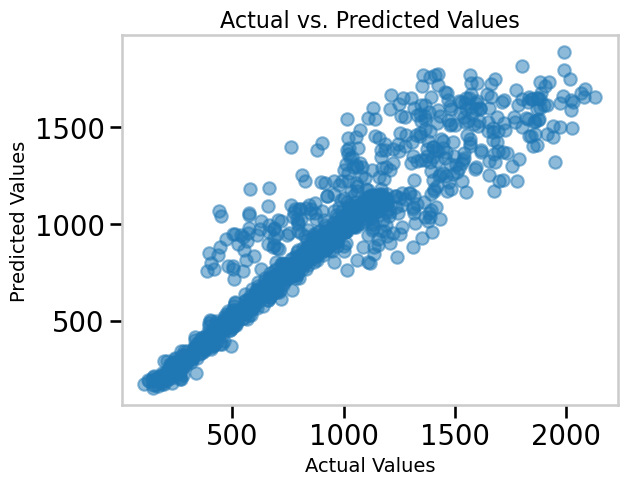

In [52]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.scatter(logistics_results_df['Actual'], logistics_results_df['Predicted'], alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


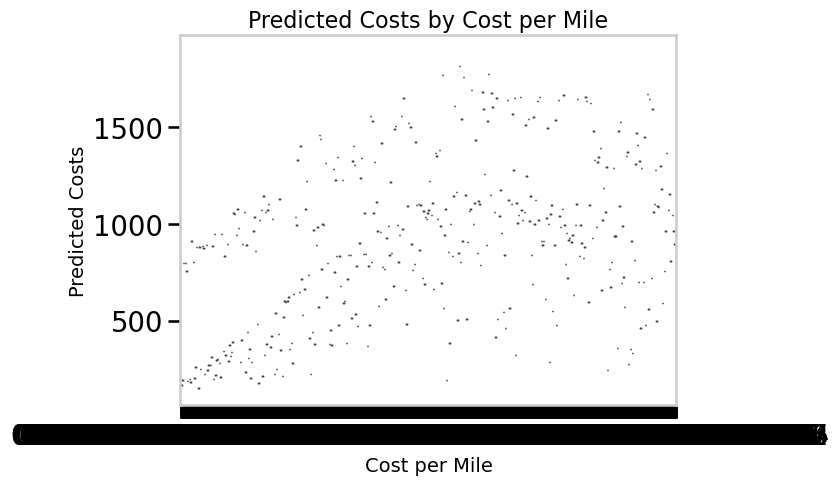

In [53]:
# Ensure 'Cost per Mile' is in the original DataFrame
engineered_data['Cost per Mile'] = engineered_data['Fuel Costs (USD)'] / engineered_data['Distance Traveled (miles)']

# Split the data as before
X = engineered_data[['Distance Traveled (miles)', 'Truck Condition', 'Driver Ratings', 'Load Weight (tons)', 'Cost per Mile']]
y = engineered_data['Total Operational Cost (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Create a DataFrame with Actual, Predicted, and Cost per Mile values
logistics_results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Cost per Mile': X_test['Cost per Mile']
})

# Plot the effect of Cost per Mile on Predicted Costs
sns.boxplot(data=logistics_results_df, x='Cost per Mile', y='Predicted')
plt.title("Predicted Costs by Cost per Mile")
plt.xlabel("Cost per Mile")
plt.ylabel("Predicted Costs")
plt.show()


Confusion Matrix (For Classification Problems)

For performing classification (e.g., predicting delayed vs. on-time delivery), create a confusion matrix:


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 103.59103074308018
Mean Squared Error (MSE): 26950.486082761876
Root Mean Squared Error (RMSE): 164.16603206133075
R^2 Score: 0.8622452355893065


Feature Importance Visualization

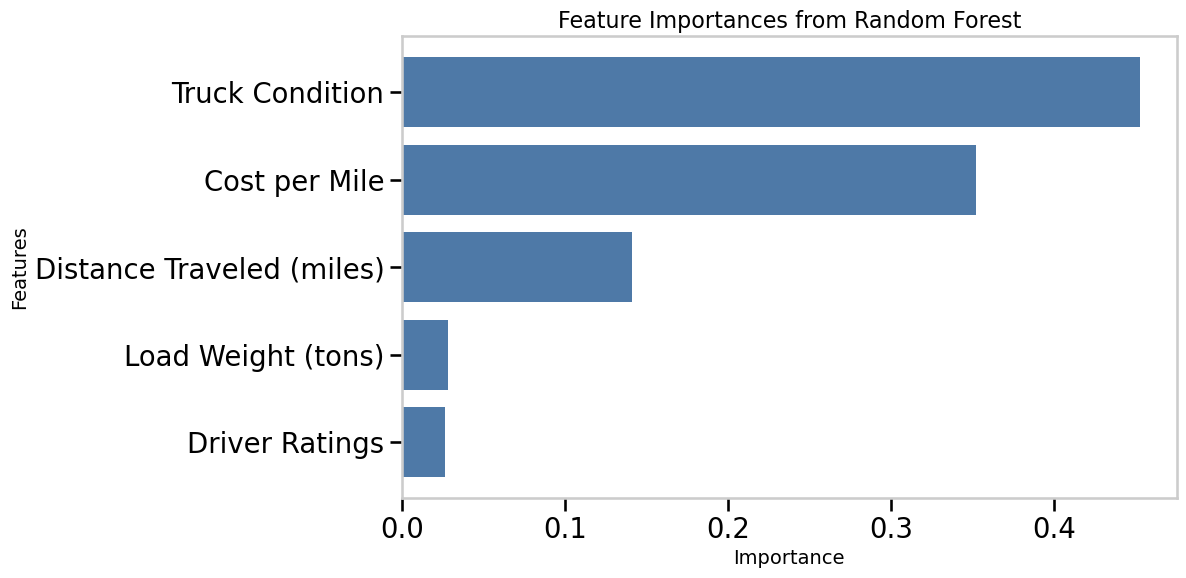

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = engineered_data[['Distance Traveled (miles)', 'Truck Condition', 'Driver Ratings', 'Load Weight (tons)', 'Cost per Mile']]
y = engineered_data['Total Operational Cost (USD)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color="#4e79a7")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and calculate RMSE for Decision Tree
y_pred_dt = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree RMSE: {dt_rmse}")

Decision Tree RMSE: 220.24931109556357


SHAP (SHapley Additive exPlanations):

Train and Evaluate the Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and calculate RMSE for Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 164.16603206133075


Create the Model Performance DataFrame

With both dt_rmse and rf_rmse, we can create the model_performance DataFrame to compare the models.


In [58]:
# Create DataFrame to compare model performance
model_performance = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'RMSE': [dt_rmse, rf_rmse]
})
print(model_performance)

           Model        RMSE
0  Decision Tree  220.249311
1  Random Forest  164.166032


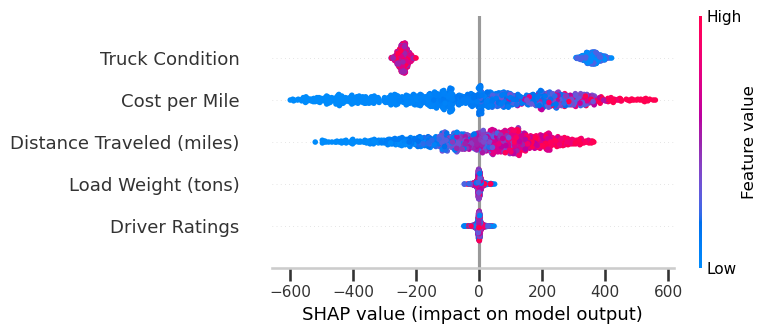

In [59]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)